<div style="font-size: 70px; font-weight: bold; border-bottom: 6px solid black; padding-bottom:20px ">6. Comparing with the Features Model</div>


<div style="font-size: 30px; padding:10px">
<h1>6.1 Overview</h1>

<p>
The aim of this research is to build a multi-input deep learning graph model to classify for Alzhiemers. The main model takes MRI Scans and patient demographics as an input to provide a prediction. 
</p>

<p>
Since more of the past studies focus on using only MRI scans, this section compares the graph model built with a model built using only the feature node of the graph model. This comparision is helpful in understanding whether a multi-input model is neccessary to classify for Alzhiemer's. 
</p>
</div>


<div style="font-size: 30px; padding:10px">
<h1>6.2 Splitting the Data</h1>
</div>

In [1]:
# imports
import tensorflow as tf
from tensorflow.keras import layers, utils
from matplotlib import pyplot as plt
import os, shutil, pathlib
from tensorflow import keras
import numpy as np

import helpers

In [2]:
# load the tensorflow dataset
dataset = tf.data.experimental.load('../data/tfdataset/final_dataset.tfrecords.gz', compression='GZIP')

# print the size of the dataset
dataset_size = 0
for _ in dataset: dataset_size += 1
print(dataset_size)

dataset = dataset.map(lambda x, y: (x['features'], y))

# define the train, val, and test split ratios
train_size = int(0.6 * dataset_size)
val_size = int(0.15 * dataset_size)

# shuffle the dataset
dataset = dataset.shuffle(buffer_size=dataset_size)

# use the helper function to split the dataset
train_dataset, val_dataset, test_dataset = helpers.split_data(dataset, train_size, val_size)

feature_input = keras.Input(shape=(7))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-09-01 06:40:56.825271: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-01 06:40:56.825378: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-01 06:40:56.855561: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4014


<div style="font-size: 30px; padding:10px">
<h1>6.3 Model</h1>
</div>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43,265
Trainable params: 43,265
Non-trainable p

2022-09-01 06:40:58.317585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/301 [============================>.] - ETA: 0s - loss: 0.7120 - accuracy: 0.5483

2022-09-01 06:41:02.054094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


301/301 [==============================] - 5s 13ms/step - loss: 0.7122 - accuracy: 0.5482 - val_loss: 0.6799 - val_accuracy: 0.5814
Epoch 2/50
301/301 [==============================] - 3s 9ms/step - loss: 0.6868 - accuracy: 0.5660 - val_loss: 0.6675 - val_accuracy: 0.5980
Epoch 3/50
301/301 [==============================] - 3s 9ms/step - loss: 0.6747 - accuracy: 0.5831 - val_loss: 0.6596 - val_accuracy: 0.6047
Epoch 4/50
301/301 [==============================] - 3s 10ms/step - loss: 0.6644 - accuracy: 0.6009 - val_loss: 0.6529 - val_accuracy: 0.6096
Epoch 5/50
301/301 [==============================] - 3s 9ms/step - loss: 0.6586 - accuracy: 0.6059 - val_loss: 0.6495 - val_accuracy: 0.6096
Epoch 6/50
301/301 [==============================] - 3s 9ms/step - loss: 0.6517 - accuracy: 0.6121 - val_loss: 0.6454 - val_accuracy: 0.6113
Epoch 7/50
301/301 [==============================] - 3s 9ms/step - loss: 0.6485 - accuracy: 0.6100 - val_loss: 0.6418 - val_accuracy: 0.6262
Epoch 8/50
301/

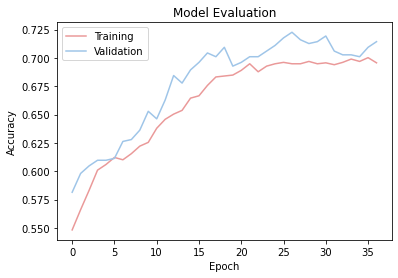

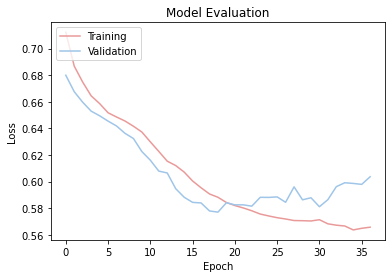

(<keras.callbacks.History at 0x167505640>,
 <keras.engine.functional.Functional at 0x167501fa0>)

In [3]:
callback = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='../models/best_feature_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
    ),
]

y = layers.Dense(256, activation="relu")(feature_input)
y = layers.Dropout(0.1)(y)
y = layers.Dense(128, activation="relu")(y)
y = layers.Dense(64, activation="relu")(y)
y = layers.Dense(1, activation="sigmoid")(y)

helpers.run_model(
    [feature_input],
    y,
    train_dataset,
    val_dataset,
    callback=callback,
    epochs=50,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005),
)

<div style="font-size: 30px; padding:10px">
<h1>6.4 Model Evaluation</h1>
</div>

In [4]:
# evaluate the model
model = keras.models.load_model('../models/best_feature_model.keras')
model.evaluate(test_dataset)

2022-09-01 06:42:46.105850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


126/126 [==============================] - 2s 5ms/step - loss: 0.5449 - accuracy: 0.7251


[0.5449432134628296, 0.7250996232032776]

<div style="font-size: 30px; padding:10px">
<h1>6.5 Summary</h1>

<p>
The accuracy on the test dataset achieved using this model is <code>72.51%</code>. This accuracy is significantly lower than the test accuracy found on the graph model <code>95.51%</code>. 
</p>

</div>

----


<div style="text-align: center; font-size: 30px; font-weight: bold; padding:20px">End of File</div>

----